<a href="https://colab.research.google.com/github/AishlyManglani/Data-Mining-Assignments/blob/main/data%20science%20methodologies/crispDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/churn-bigml-20.csv')

# Overview of the dataset
print("Dataset Overview:")
print(data.info())

# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Statistical summary of the dataset
print("\nStatistical Summary:")
print(data.describe())

# Distribution of the target variable 'Churn'
print("\nChurn Distribution:")
print(data['Churn'].value_counts())



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      

In [ ]:
# Dropping irrelevant columns (e.g., 'State', 'Area code')
data = data.drop(columns=['State', 'Area code'])

# Encoding categorical variables (like 'International plan', 'Voice mail plan', and 'Churn')
data['International plan'] = data['International plan'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Voice mail plan'] = data['Voice mail plan'].apply(lambda x: 1 if x == 'Yes' else 0)
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Handling missing values (if any)
data.fillna(data.median(), inplace=True)

# Feature Engineering: Creating new features
data['Total charge'] = data['Total day charge'] + data['Total eve charge'] + data['Total night charge'] + data['Total intl charge']
data['Total minutes'] = data['Total day minutes'] + data['Total eve minutes'] + data['Total night minutes'] + data['Total intl minutes']
data['Total calls'] = data['Total day calls'] + data['Total eve calls'] + data['Total night calls'] + data['Total intl calls']

# Splitting the data into features (X) and target variable (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Output the shape of the training and testing datasets
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


Training Data Shape: (466, 20)
Testing Data Shape: (201, 20)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Model Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       201

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201


Confusion Matrix:
[[201]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


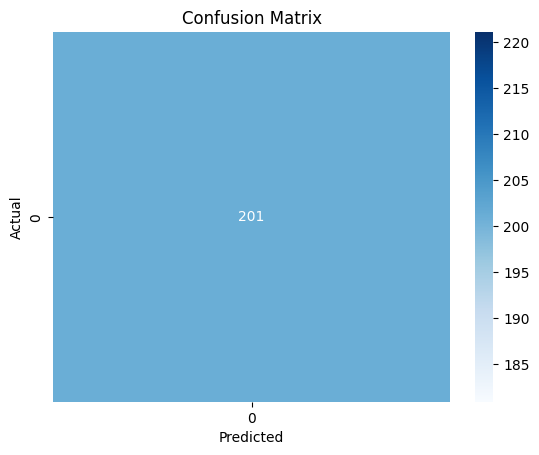

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Further evaluation can involve cross-validation, hyperparameter tuning, etc.


In [ ]:
# Saving the model using joblib
import joblib

# Save the trained model to a file
joblib.dump(rf_model, 'churn_prediction_model.pkl')

# Load the model later for deployment
loaded_model = joblib.load('churn_prediction_model.pkl')

# Predicting on new data (Example)
new_data = X_test.iloc[0].values.reshape(1, -1)
predicted_churn = loaded_model.predict(new_data)
print(f"Predicted Churn: {'Yes' if predicted_churn[0] == 1 else 'No'}")



Predicted Churn: No


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
